In [153]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Data Exploration & Preprocessing

In [156]:
df=pd.read_csv(r"C:\Users\siril\OneDrive\Desktop\CV Projects\internproject\Dataset .csv", encoding="ISO-8859-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,??stanbul,"Kemanke?? Karamustafa Pa??a Mahallesi, R?ht?m ...",Karak?_y,"Karak?_y, ??stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A??ac?,208,??stanbul,"Ko??uyolu Mahallesi, Muhittin ??st?_nda?? Cadd...",Ko??uyolu,"Ko??uyolu, ??stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,??stanbul,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",Kuru?_e??me,"Kuru?_e??me, ??stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A???k Kahve,208,??stanbul,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",Kuru?_e??me,"Kuru?_e??me, ??stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [157]:
df = df.replace(r"\?\?", "", regex=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R?ht?m Cadd...",Karak?_y,"Karak?_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac?,208,stanbul,"Kouyolu Mahallesi, Muhittin st?_nda Caddesi, N...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru?_eme Mahallesi, Muallim Naci Caddesi, No ...",Kuru?_eme,"Kuru?_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A?k Kahve,208,stanbul,"Kuru?_eme Mahallesi, Muallim Naci Caddesi, No ...",Kuru?_eme,"Kuru?_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [158]:
df = df.replace(r"\?", "", regex=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [160]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [163]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [164]:
df['Aggregate rating'].value_counts().head()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
Name: count, dtype: int64

# Key observations:
* Many restaurants have 0.0 rating
    
    2148 out of 9551 restaurants
    
    These are unrated restaurants
    
    ≈ 22.5% of the dataset 

* Most rated restaurants fall between 3.0 – 3.5
    
    Indicates average to good quality
    
    Very few extremely low or very high ratings

* Clear class imbalance
    
    0.0 rating dominates
    
    Other ratings are much smaller

# Check Dupicate Value

In [167]:
df.duplicated().sum()

0

# Descriptive Analysis

In [169]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Distribution of Categorical Variables

## Country Code distribution

In [179]:
df['Country Code'].value_counts().head(10)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

## City distribution

In [182]:
df['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

## Cuisines distribution

In [184]:
df['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

## Top Cities with Highest Number of Restaurants

In [187]:
top_cities = df['City'].value_counts().head(10)
top_cities

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

## Top Cuisines with Highest Number of Restaurants

In [190]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

# Geospatial Analysis

# 1.Visualize Restaurant Locations (Latitude & Longitude)
## Basic scatter plot 

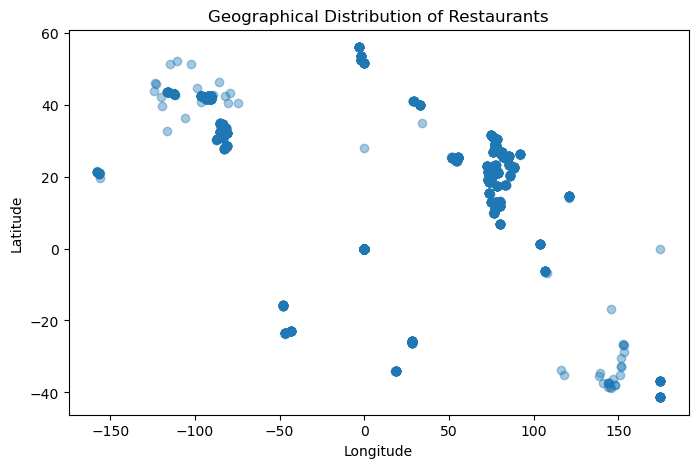

In [196]:
plt.figure(figsize=(8,5))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Restaurants")
plt.show()

 * Each dot = one restaurant
 * Dense clusters = cities with many restaurants
 * Global spread visible

# Distribution Across Cities / Countries
## Restaurants per country

In [200]:
df['Country Code'].value_counts().head(10)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

    * A few countries dominate restaurant count
    * Indicates uneven geographic distribution

## Restaurants per city

In [204]:
df['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

    * Metro cities have highest concentration
    * Driven by population & demand

In [206]:
# Correlation check
df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.043207,0.000516
Longitude,0.043207,1.000000,-0.116818
Aggregate rating,0.000516,-0.116818,1.000000


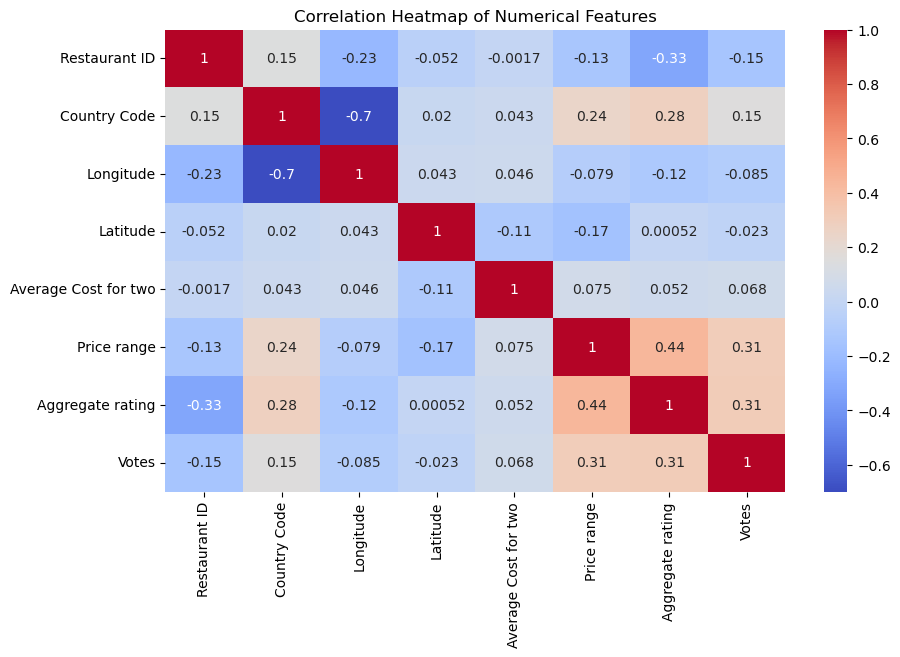

In [208]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    df.select_dtypes(include='number').corr(),
    cmap='coolwarm',
    annot=True
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Percentage of Restaurants Offering Table Booking & Online Delivery

In [212]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Percentage of Restaurants Offering Table Booking & Online Delivery

## Approach
    * Count restaurants with Yes / No
    * Convert counts into percentages

In [214]:
# Percentage of Table Booking availability
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100

# Percentage of Online Delivery availability
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Table Booking Availability (%)")
print(table_booking_pct)

print("\nOnline Delivery Availability (%)")
print(online_delivery_pct)


Table Booking Availability (%)
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery Availability (%)
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


# Visualization

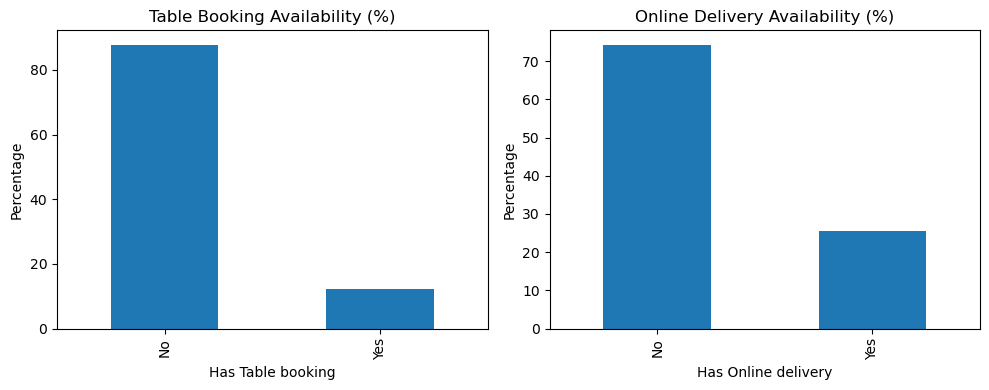

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
table_booking_pct.plot(kind='bar')
plt.title('Table Booking Availability (%)')
plt.ylabel('Percentage')

plt.subplot(1,2,2)
online_delivery_pct.plot(kind='bar')
plt.title('Online Delivery Availability (%)')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


### A larger proportion of restaurants do not provide table booking, whereas online delivery is more commonly available

# Average Ratings: With vs Without Table Booking

## Approach
    
    * Group by Has Table booking
    * Calculate mean rating

In [219]:
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(avg_rating_table_booking)


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


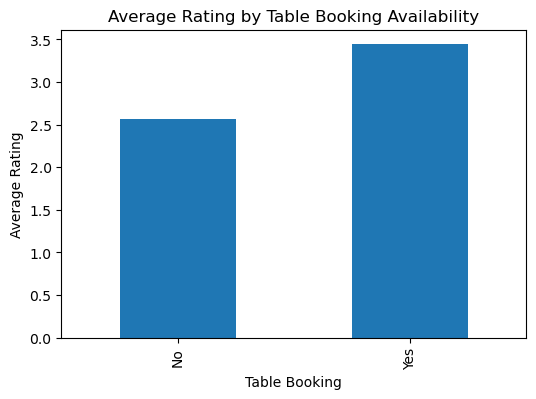

In [220]:
avg_rating_table_booking.plot(kind='bar', figsize=(6,4))
plt.title('Average Rating by Table Booking Availability')
plt.ylabel('Average Rating')
plt.xlabel('Table Booking')
plt.show()

### Restaurants offering table booking tend to have slightly higher average ratings, indicating better customer experience and service quality.

# Online Delivery Availability Across Price Ranges

## Approach

    * Use a cross-tabulation
    * Normalize by price range

In [226]:
delivery_price_range = pd.crosstab(
    df['Price range'],
    df['Has Online delivery'],
    normalize='index'
) * 100

print(delivery_price_range)


Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


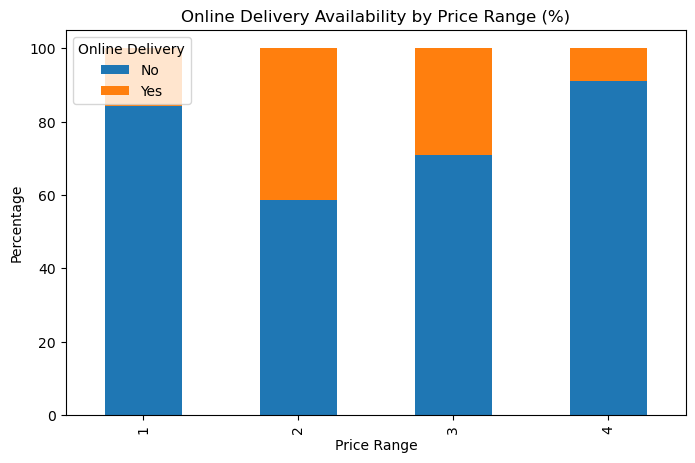

In [227]:
delivery_price_range.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)
plt.title('Online Delivery Availability by Price Range (%)')
plt.ylabel('Percentage')
plt.xlabel('Price Range')
plt.legend(title='Online Delivery')
plt.show()


### Online delivery is most common among mid-range restaurants, while high-priced restaurants rely more on dine-in services.

# Most Common Price Range Among Restaurants

## Approach
    * Count the frequency of each price range
    * Identify the highest count

In [232]:
# Count restaurants in each price range
price_range_count = df['Price range'].value_counts()

print(price_range_count)


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


# Visualization

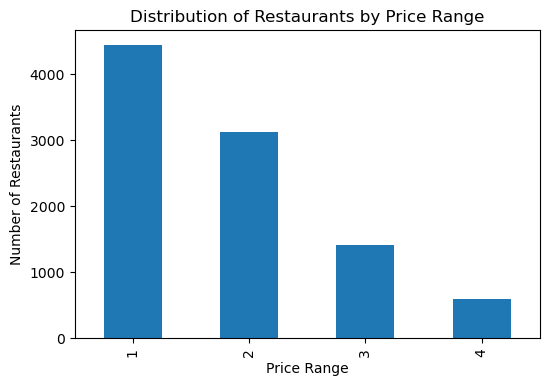

In [234]:
price_range_count.plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

# Average Rating for Each Price Range

## Approach

    * Group by Price range
    * Calculate mean of Aggregate rating

In [236]:
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean()
print(avg_rating_price)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


# Visualization

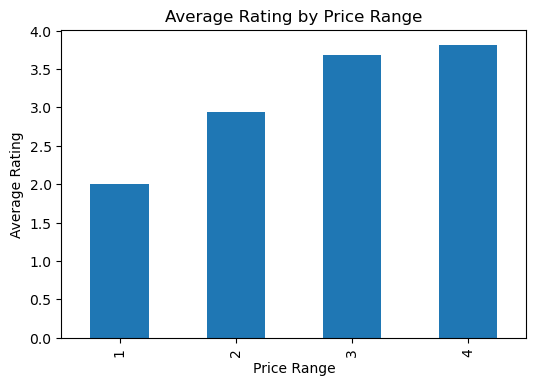

In [240]:
avg_rating_price.plot(kind='bar', figsize=(6,4))
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

### Higher price ranges generally show better average ratings, suggesting improved service quality and dining experience.

# Color Representing the Highest Average Rating

    In the dataset, price ranges are mapped to colors (example: Dark Green, Green, Yellow, Orange, Red).
    
    * Approach
    
    * Group by Rating color
    * Calculate average rating
    * Identify the highest

In [244]:
rating_color_avg = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
print(rating_color_avg)

Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64


In [246]:
highest_rating_color = rating_color_avg.idxmax()
highest_rating_value = rating_color_avg.max()

print(f"Highest average rating is represented by '{highest_rating_color}' color with rating {highest_rating_value:.2f}")

Highest average rating is represented by 'Dark Green' color with rating 4.66


### The Dark Green color represents the highest average rating, indicating excellent restaurant quality and customer satisfaction.

# Feature Engineering
    Enhance the dataset by creating meaningful features that help improve analysis and model performance.

## Extract Features from Existing Columns
### 1.Length of Restaurant Name
    *Longer names may indicate branding or premium positioning.

In [252]:
df['Restaurant_Name_Length'] = df['Restaurant Name'].astype(str).apply(len)

### 2. Length of Restaurant Address
    
    Address length can loosely reflect location detail and business size.

In [254]:
df['Address_Length'] = df['Address'].astype(str).apply(len)

## Encoding Categorical Variables
### 1. Has Table Booking (Binary Encoding)

In [258]:
df['Has_Table_Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

### 2.Has Online Delivery (Binary Encoding)

In [263]:
df['Has_Online_Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

## Additional Useful Features
    1. Number of Cuisines Offered
    
    More cuisines may attract more customers.

In [267]:
df['Cuisine_Count'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')))

In [268]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_Length,Address_Length,Has_Table_Booking,Has_Online_Delivery,Cuisine_Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,16,71,1,0,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,16,67,1,0,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,22,56,1,0,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4,4.9,Dark Green,Excellent,365,4,70,0,0,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4,4.8,Dark Green,Excellent,229,11,64,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,3,4.1,Green,Very Good,788,10,91,0,0,1
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,3,4.2,Green,Very Good,1034,9,66,0,0,3
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,4,3.7,Yellow,Good,661,5,64,0,0,2
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,4,4.0,Green,Very Good,901,8,66,0,0,1


# Predictive Modeling
    Build regression models to predict the Aggregate Rating of a restaurant using engineered features and evaluate their performance.

# 1.Feature Selection & Target Variable

In [281]:
# Select features
features = [
    'Price range',
    'Has_Table_Booking',
    'Has_Online_Delivery',
    'Restaurant_Name_Length',
    'Address_Length',
    'Cuisine_Count',
    'Votes'
]

X = df[features]
y = df['Aggregate rating']

# 2.Train–Test Split

In [286]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Linear Regression

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)

Linear Regression
MAE: 1.0782338131858322
RMSE: 1.2917914289501204
R2 Score: 0.2668518497956037


# Model 2: Decision Tree Regressor

In [294]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nDecision Tree")
print("MAE:", dt_mae)
print("RMSE:", dt_rmse)
print("R2 Score:", dt_r2)


Decision Tree
MAE: 0.3140240711669283
RMSE: 0.48407934271883135
R2 Score: 0.8970467534530351


# Model 3: Random Forest Regressor 

In [298]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)


Random Forest
MAE: 0.22653555854576266
RMSE: 0.34559716506614396
R2 Score: 0.9475256233289973


# Model Performance Comparison

In [301]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [lr_mae, dt_mae, rf_mae],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse],
    'R2 Score': [lr_r2, dt_r2, rf_r2]
})

model_comparison

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.078234,1.291791,0.266852
1,Decision Tree,0.314024,0.484079,0.897047
2,Random Forest,0.226536,0.345597,0.947526


### 
    The Random Forest Regressor significantly outperforms Linear Regression and Decision Tree models, making it the most reliable model for predicting restaurant ratings.This indicates that restaurant ratings depend on complex, non-linear interactions between features such as price range, votes, and service availability.

# Customer Preference Analysis
    Understand how cuisine type influences customer ratings and popularity, helping identify cuisines that perform best in terms of quality and customer engagement.

## Relationship Between Cuisine Type and Restaurant Rating

### Approach

 * Restaurants may offer multiple cuisines
 * Split cuisines and analyze average rating per cuisine

In [309]:
# Split cuisines into individual rows
cuisine_df = df.copy()
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].astype(str).str.split(', ')
cuisine_df = cuisine_df.explode('Cuisines')

# Average rating per cuisine
avg_rating_cuisine = (
    cuisine_df.groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

avg_rating_cuisine.head(10)

Cuisines
Sunda         4.900000
B_rek         4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D_ner         4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

# Visualization

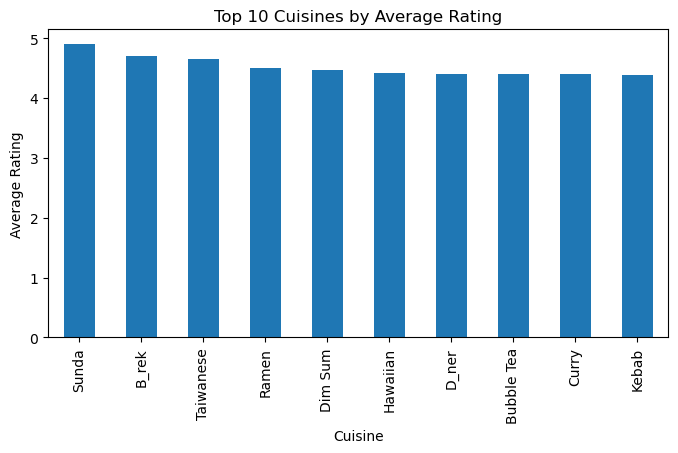

In [314]:
avg_rating_cuisine.head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

## Most Popular Cuisines Based on Customer Votes
### Approach

 * Aggregate votes by cuisine
 * Identify cuisines with highest engagement

In [317]:
popular_cuisines = (
    cuisine_df.groupby('Cuisines')['Votes']
    .sum()
    .sort_values(ascending=False)
)

popular_cuisines.head(10)

Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

# Visualization

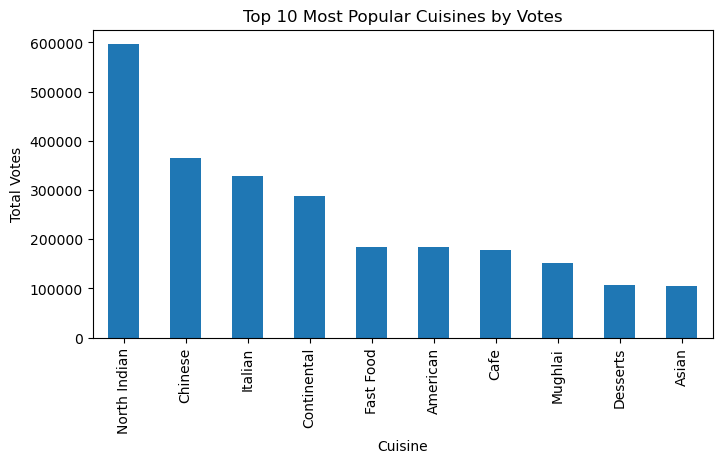

In [320]:
popular_cuisines.head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.show()

#
    Popular cuisines attract more customer engagement, reflecting demand and widespread acceptance.

## Cuisines with Consistently Higher Ratings
### Approach

 * Filter cuisines with sufficient data (avoid bias)
 * Compare rating stability

In [324]:
# Count restaurants per cuisine
cuisine_count = cuisine_df['Cuisines'].value_counts()

# Filter cuisines with enough samples
valid_cuisines = cuisine_count[cuisine_count >= 50].index

high_rating_cuisines = (
    cuisine_df[cuisine_df['Cuisines'].isin(valid_cuisines)]
    .groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

high_rating_cuisines.head(10)

Cuisines
Sandwich         4.066038
Steak            3.985484
Sushi            3.973333
Mediterranean    3.948214
Indian           3.918571
European         3.910811
Seafood          3.862069
Asian            3.815021
Japanese         3.797037
Mexican          3.723204
Name: Aggregate rating, dtype: float64

#
    Some cuisines maintain high average ratings across many restaurants, suggesting strong and consistent customer preference

# Data Visualization

    * Rating distribution
    * Comparison across cuisines and cities
    * Relationships between features and the target variable (Aggregate Rating)

## Distribution of Ratings
### Histogram of Aggregate Ratings

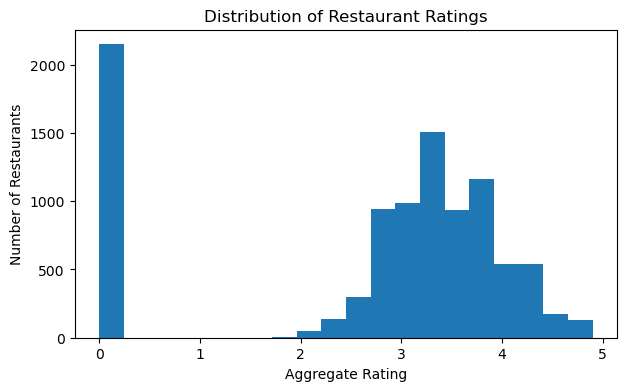

In [332]:
plt.figure(figsize=(7,4))
plt.hist(df['Aggregate rating'], bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

###  Bar Plot of Rating Counts

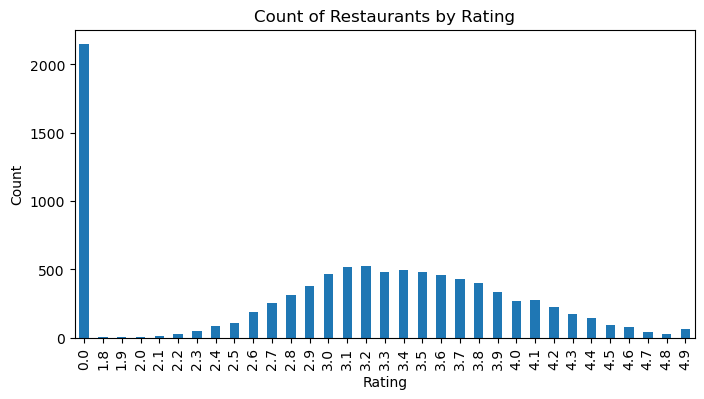

In [338]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(8,4))
rating_counts.plot(kind='bar')
plt.title('Count of Restaurants by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 
    Ratings around 4.0 are the most common, showing customer satisfaction skewed toward higher ratings.

## Comparing Average Ratings
### Average Rating by Cuisine (Top 10)

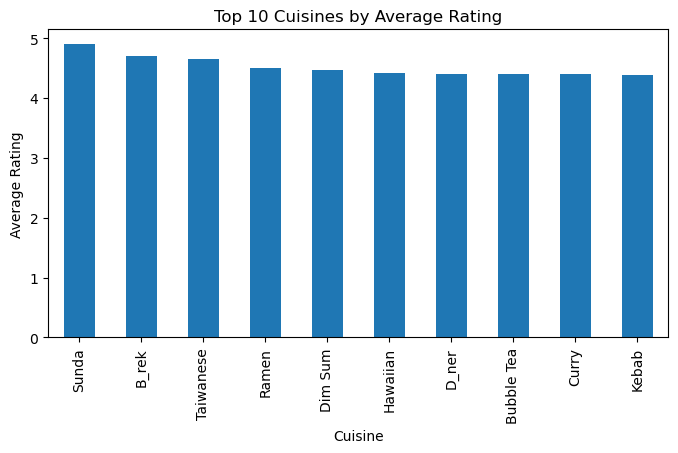

In [344]:
avg_rating_cuisine.head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

# 
    Certain cuisines consistently achieve higher average ratings, indicating strong customer preference.

### Average Rating by City (Top 10)

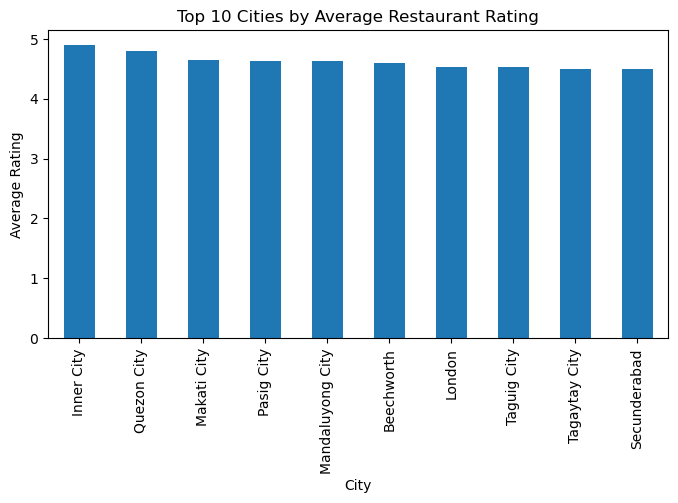

In [349]:
avg_rating_city = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

avg_rating_city.head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

# 
    Cities with higher average ratings may reflect better food culture or service quality.

## Relationship Between Features and Target Variable
### Votes vs Aggregate Rating (Scatter Plot)

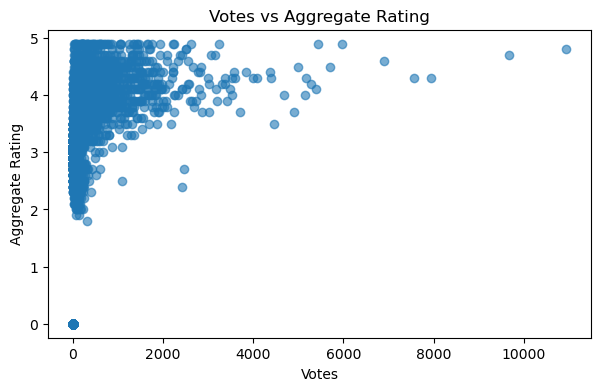

In [354]:
plt.figure(figsize=(7,4))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.6)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# 
    Higher price ranges tend to show slightly higher median ratings, reflecting premium service quality.